# 가설 수립 및 통계적 검정 (T-test 등)
각각의 그래프를 보며 가설을 검증할 때, 최대한 많은 가설을 검증해야함.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import sys
sys.path.append('../../../01_Shared_Lib')
import constants as c

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic') 
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [10]:
#파일 경로
filepath = Path("../../../00_Common_Data/Master_Sales_2025_Total.parquet")

#파일 불러오기
df = pd.read_parquet(filepath)
df

#음식 데이터 
food_df = df[df['card_tpbuz_nm_1'] == '음식']

#음식 데이터 중 간이주점 선택
pubs_df = food_df[food_df['card_tpbuz_nm_2'] == '간이주점']
pubs_df['day'] = pubs_df['day'].map(c.DAY_CODE)
pubs_df

C:\Users\jinwoo\AppData\Local\Temp\ipykernel_8208\1545358705.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_df['day'] = pubs_df['day'].map(c.DAY_CODE)


,ta_ymd,cty_rgn_no,admi_cty_no,card_tpbuz_cd,card_tpbuz_nm_1,card_tpbuz_nm_2,hour,sex,age,day,amt,cnt,month,period
355,2025-01-01,41500,41500250,Q01,음식,간이주점,1,F,3,3,78552,2,1,겨울
356,2025-01-01,41500,41500250,Q01,음식,간이주점,1,M,3,3,234802,3,1,겨울
357,2025-01-01,41500,41500250,Q01,음식,간이주점,4,F,4,3,44399,2,1,겨울
358,2025-01-01,41500,41500250,Q01,음식,간이주점,4,M,7,3,39276,2,1,겨울
359,2025-01-01,41500,41500250,Q01,음식,간이주점,5,F,6,3,81318,2,1,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097041,2025-10-31,41500,41500530,Q01,음식,간이주점,9,M,4,5,80260,2,10,가을
5097042,2025-10-31,41500,41500530,Q01,음식,간이주점,9,M,6,5,74162,2,10,가을
5097043,2025-10-31,41500,41500530,Q01,음식,간이주점,9,M,7,5,35861,2,10,가을
5097044,2025-10-31,41500,41500530,Q01,음식,간이주점,10,M,5,5,353313,3,10,가을


In [11]:
pubs_df['day'] = pubs_df['day'].astype(int)

C:\Users\jinwoo\AppData\Local\Temp\ipykernel_8208\215336754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_df['day'] = pubs_df['day'].astype(int)


# 첫번째 가설
1. 다음 날이 주말에 가까울 수록 사람들의 소비성향이 커진다.
 - 이는 개인적인 시간의 확보와도 연관이 있다.
 
# 적용 기법
 - 가변수 회귀분석(Dummy Variable Regression)
 - 선형적 가중치 부여 모델
 - ANOVA

C:\Users\jinwoo\AppData\Local\Temp\ipykernel_8208\2289993998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_df['week'] = pubs_df['day'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
C:\Users\jinwoo\AppData\Local\Temp\ipykernel_8208\2289993998.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_df['age_group'] = pd.cut(pubs_df['age'], bins=[2,3,4,5,6], labels=['20s','30s','40s','50s'])
C:\Users\jinwoo\AppData\Local\Temp\ipykernel_8208\2289993998.py:9: SettingWithCopyWarning: 
A valu

                            sum_sq       df          F        PR(>F)
C(week)               3.995384e+10      1.0  18.777050  1.471727e-05
C(age_group)          1.248863e+11      3.0  19.564219  1.134401e-12
C(week):C(age_group)  3.322968e+10      3.0   5.205635  1.359887e-03
Residual              1.227380e+14  57683.0        NaN           NaN


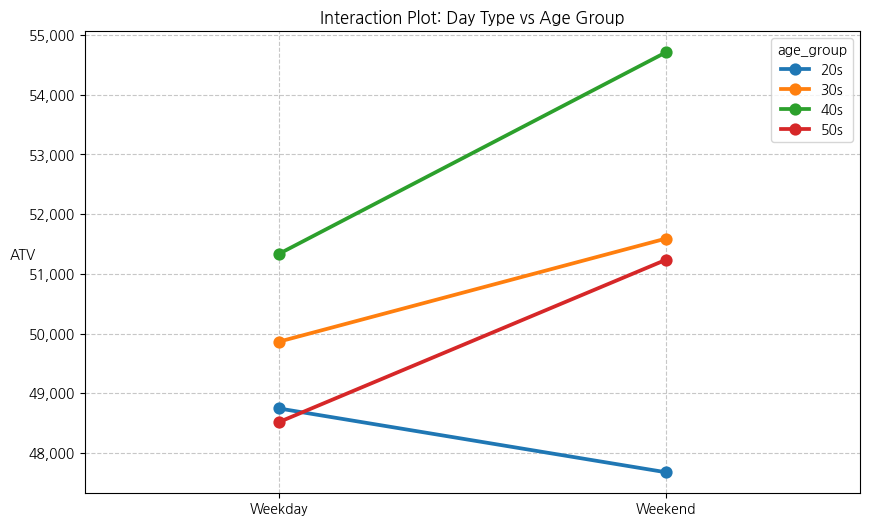

In [12]:
# 선형은 방법론적 오류임
## Two-way ANOVA 분석 해보자
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.ticker as ticker

pubs_df['week'] = pubs_df['day'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
pubs_df['age_group'] = pd.cut(pubs_df['age'], bins=[2,3,4,5,6], labels=['20s','30s','40s','50s'])
pubs_df['ATV'] = pubs_df['amt']/pubs_df['cnt']

model = ols('ATV ~ C(week) * C(age_group)', data=pubs_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# 4. 시각화 (상호작용 그래프)
fig, ax = plt.subplots(figsize=(10, 6))
ANOVA = sns.pointplot(x='week', y='ATV', hue='age_group', data=pubs_df, errorbar=None, ax=ax)
ANOVA.set_title('Interaction Plot: Day Type vs Age Group')
ANOVA.grid(linestyle='--',alpha= 0.7)
ANOVA.set_xlabel('')
ANOVA.set_ylabel('ATV',rotation=0)

ANOVA.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos:f'{y:,.0f}'))

In [13]:
#파생 변수 생성
pubs_df['is_eve_of_weekend'] = pubs_df['day'].apply(lambda x: 1 if x in [5,6] else 0)

#회귀모델
import statsmodels.formula.api as smf

#ATV = beta_0 + beta_1(is_eve_of_weekend) + beta_2(age) + beta_3(sex) + epsilon
formula = 'ATV ~ C(is_eve_of_weekend) * C(age_group) + C(sex) + hour'
model = smf.ols(formula, data=pubs_df).fit()
print(model.summary())

C:\Users\jinwoo\AppData\Local\Temp\ipykernel_8208\2625073975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_df['is_eve_of_weekend'] = pubs_df['day'].apply(lambda x: 1 if x in [5,6] else 0)


                            OLS Regression Results                            
Dep. Variable:                    ATV   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     49.01
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           5.30e-89
Time:                        17:19:43   Log-Likelihood:            -7.0124e+05
No. Observations:               57691   AIC:                         1.402e+06
Df Residuals:                   57681   BIC:                         1.403e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [14]:
#가중치 비교 분석
model = smf.ols('ATV ~ C(day)', data=pubs_df).fit()
constrast_vector = np.array([-1,-1,-1,-1,2.5,2.5,-1])
model_cell = smf.ols('ATV ~ C(day)-1', data=pubs_df).fit()
t_test = model_cell.t_test(constrast_vector)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          1.123e+04   2179.136      5.151      0.000    6954.591    1.55e+04


5의 기울기 1.08
6의 기울기 1.075


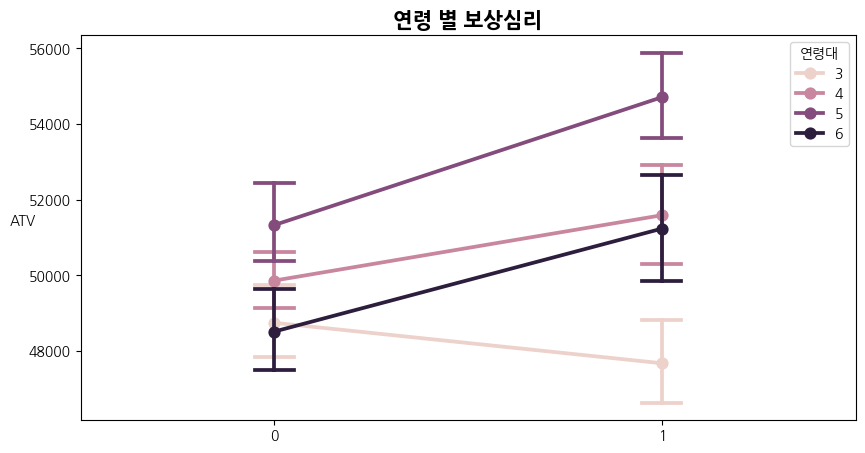

In [16]:
#RI 만들어봤는데 1.05~1.06임
#연령대별로 유의미한 보상심리 차이가 있다고 나왔으므로, '누가', '언제(시간, 요일)' 보상심리가 강한지 분석
#자꾸 ATV를 만들어놓으니 또 계산하게 됨 -> 다른 방법 고안

#일단 시각화
target_age=[3,4,5,6]
filtered_pubs = pubs_df[pubs_df['age'].isin(target_age)]


fig, ax = plt.subplots(figsize=(10, 5))
Interaction_Plot = sns.pointplot(x='is_eve_of_weekend', y='ATV',data=filtered_pubs, hue='age', ax=ax,
capsize=0.1)
Interaction_Plot.set_xlabel('', rotation=0)
Interaction_Plot.set_ylabel('ATV', rotation=0)
Interaction_Plot.legend(title='연령대', loc='best') 
Interaction_Plot.set_title('연령 별 보상심리', fontsize=15, weight='bold')

#기울기를 어떻게 구할까 -> 상대적 변화율
## 5랑 6만 보면 됨
filtered_pubs_5 = filtered_pubs[filtered_pubs['age']==5]

filtered_pubs_5_regroup = filtered_pubs_5.groupby(['age','is_eve_of_weekend'])[['amt','cnt']].sum()
filtered_pubs_5_regroup['ATV'] = filtered_pubs_5_regroup['amt']/filtered_pubs_5_regroup['cnt']
filtered_pubs_5_regroup.loc[(5,0), 'ATV']

y_value = filtered_pubs_5_regroup.loc[(5,1), 'ATV']
x_value = filtered_pubs_5_regroup.loc[(5,0), 'ATV']

related_5_rate = y_value/x_value
print(f'5의 기울기 {related_5_rate:.2f}')

# filtered_pubs_6 = filtered_pubs[filtered_pubs['age']==6]
filtered_pubs_6 = filtered_pubs[filtered_pubs['age']==6]

filtered_pubs_6_regroup = filtered_pubs_6.groupby(['age','is_eve_of_weekend'])[['amt','cnt']].sum()
filtered_pubs_6_regroup['ATV'] = filtered_pubs_6_regroup['amt']/filtered_pubs_6_regroup['cnt']
filtered_pubs_6_regroup.loc[(6,0), 'ATV']

y_value = filtered_pubs_6_regroup.loc[(6,1), 'ATV']
x_value = filtered_pubs_6_regroup.loc[(6,0), 'ATV']

related_6_rate = y_value/x_value
print(f'6의 기울기 {related_6_rate:.3f}')

In [ ]:
pubs_df['day'] # 4가 목요일

#대조군 비교군? 설정
## 목요일 저녁(21시 이후) 소비가 금요일과 대등하다면?내일은 대충 버티면 된다"는 심리가 압박을 이겨낸 것

#교차군
# 목 (4)

#해방
# 금, 토(5,6)

#압박(7)

#대조군
#월, 화, 수(1,2,3)



355        3
356        3
357        3
358        3
359        3
          ..
5097041    5
5097042    5
5097043    5
5097044    5
5097045    5
Name: day, Length: 65390, dtype: int64

# 두번째 가설
대부분의 그래프에서 남자의 매출총액과 매출건수보다 여자보다 월등히 높은 것을 보아
 남자가 결제를 주도한다.(회식모임 등)
 1. 데이트와 같은 모임에서도 그러할것이다(남자 연령대별로 분석, 프리미엄 업종 분석해봐야 암)
 2. 여자보다 남자가 많은 이유는 법카 등 다른 이유도 있긴할듯? 
 3. 주말로 갈 수록 여자 비중도 커질까 ? 

# 세번째 가설
1. 첫번째 가설과도 연관이 있는 것인데, 개인적인 시간이 존재해야 돈을 쓸 수 있으므로 개인적인 시간이 형성되는 타이밍일수록 소비성향은 커질것이다.
  - 특히, 20 30은 젊음의 체력이 있으므로 새벽에도 매출을 담당하며, 연령대가 높아질수록 낮아질것이다.
2. 회식이 일어나는 시간대가 매출이 높아질것이다.(특히 결제 주도자는 40, 50대일 것이다.(카드소유자))

#네번째 가설
요일별 매출건수 추이 확인 결과
1. 화 -> 수 요일에 갑자기 확 올라가는 경향을 파악함
2. 화,수,목은 원래 비슷하다는걸 확인했으므로 수요일과 목요일이 비슷한건 괜찮지만, 목요일이 수요일보다 작다
 -> 수요일, 목요일에 무언가 있다. ( 특히 30대, 60대)
 

#다섯번째 가설
요일별 성별 점유율에서 금, 토의 남자 점유율이 꺽이는(저조해지는) 경향 파악
1. 주말에 남자 점유율이 꺽인 이유는 여성들이 주말에 모임이 있을 것이다(여성들이 더 많이 나오는 요소가 있다.)
 - 여기에는 회식도 있을 수 있겠죠 ?
2. 매출총액은 여전히 남자는 70%인것으로 보아 남성이 더 많이 사용하긴 하나봐요 ( Multiplier 확인해보는것도 방법 )
3. 업종이 업종인 만큼 주말이여도 늦은 시간대일수록 점유율이 높다.

#여섯번째 가설
월 별 매출건수 매출총액 이중축 그래프 확인 결과
1. 매출건수가 가장 낮으나 객단가가 높다(2월에는 확실히 뭔가 있음.)
2. 7,8월 즉 여름에 소비성향이 활발해진다.(근데 7월과 8월 사이 객단가가 3천원이나 차이남 -> 이유가 왜지 ?)
 -> 왜 객단가를 더 낮추고 매출총액은 비슷할까 

# 일곱번째 가설
계절 별 시계열분석 결과
1. 봄 토요일에는 매출총액을 높이는 원인(이유)가 있을 것이다.

겨울은 소비성향이 저하된다( 왜 ?, 밖에 잘 안나가서인가/  특별하게 못느끼나/ 크리스마스가 있는데 ? )



#요일별 정규화 점유율
1. 30대는 점유율이 비슷함
2. 20대는 주말로 갈수록 늘어남
3. 40대부터는 변화가 미미함

---
지역별 분석에서 장호원 요일별 점유율  
수, 목의 남자 점유율이 매우 높으며 오히려 토요일은 떨어짐(누적세로막대형으로 바꿀 시 비슷함.) -> 여자 점유율 증가
매출건수 역시 여자 점유율이 많이 늘었음

장호원에서 월 별 성별 구매액
5월이 젤 높음 남성
7, 8월 매출이 높은데, 점유율이여자가 꽤 높음 (남성이 낮아도 여성이 높음)

장호원 히트맵

이천시 2월 토요일에는 매출을 올리는 무언가가 있음 
심지어 2월 토요일 매출건수는 매출건수가 작은편 (객단가가 왜 높지)
여름이 아님에도 매출액이 많이 올라감 


5월 목요일은 매출건수가 높고 매출총액이 낮음

8월 금요일 여름이니까

8월 일요일은 미친 왜높아 (아 일요일 특징임 매출건수 높고 매출총액 낮은거)


이천시 토요일